In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


In [4]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)

images =[]
labels =[]
for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img, (64 ,64))
      images.append(img)
      labels.append(category)

images = np.array(images)



Tomato___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Early_blight
Tomato___Bacterial_spot


In [6]:
#convert to numpy array
x = np.array(images)
y = np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape :", x.shape)

Labels: ['Tomato___Early_blight' 'Tomato___Late_blight' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']
Data Shape : (9602, 64, 64, 3)


class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1961
Tomato___Late_blight                      1851
Tomato___healthy                          1834
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1805
Tomato___Early_blight                      324
Name: count, dtype: int64


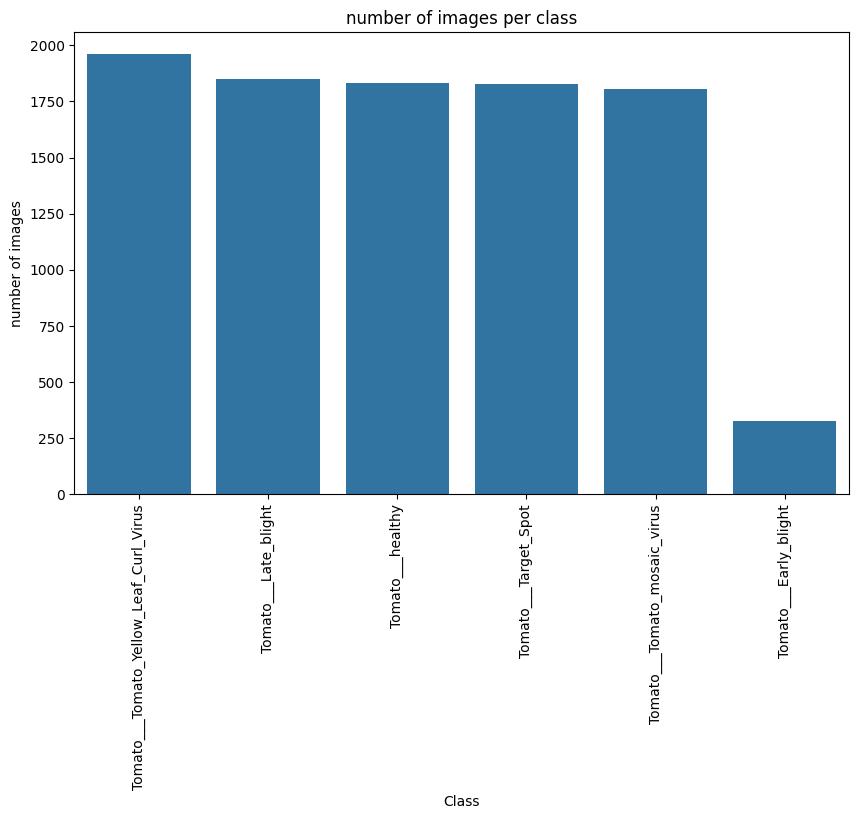

In [7]:
class_counts = pd.Series(y).value_counts()
print("class Distribution")
print(class_counts)

#plot class Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("number of images")
plt.title("number of images per class")
plt.show()


In [8]:
valid_images=[]
valid_labels=[]

for img,label in zip(x,y):
  if img.shape==(64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)
print("Cleaned Data Shape: ",x.shape)

Cleaned Data Shape:  (9602, 64, 64, 3)


In [9]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_
class_names

array(['Tomato___Early_blight', 'Tomato___Late_blight',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

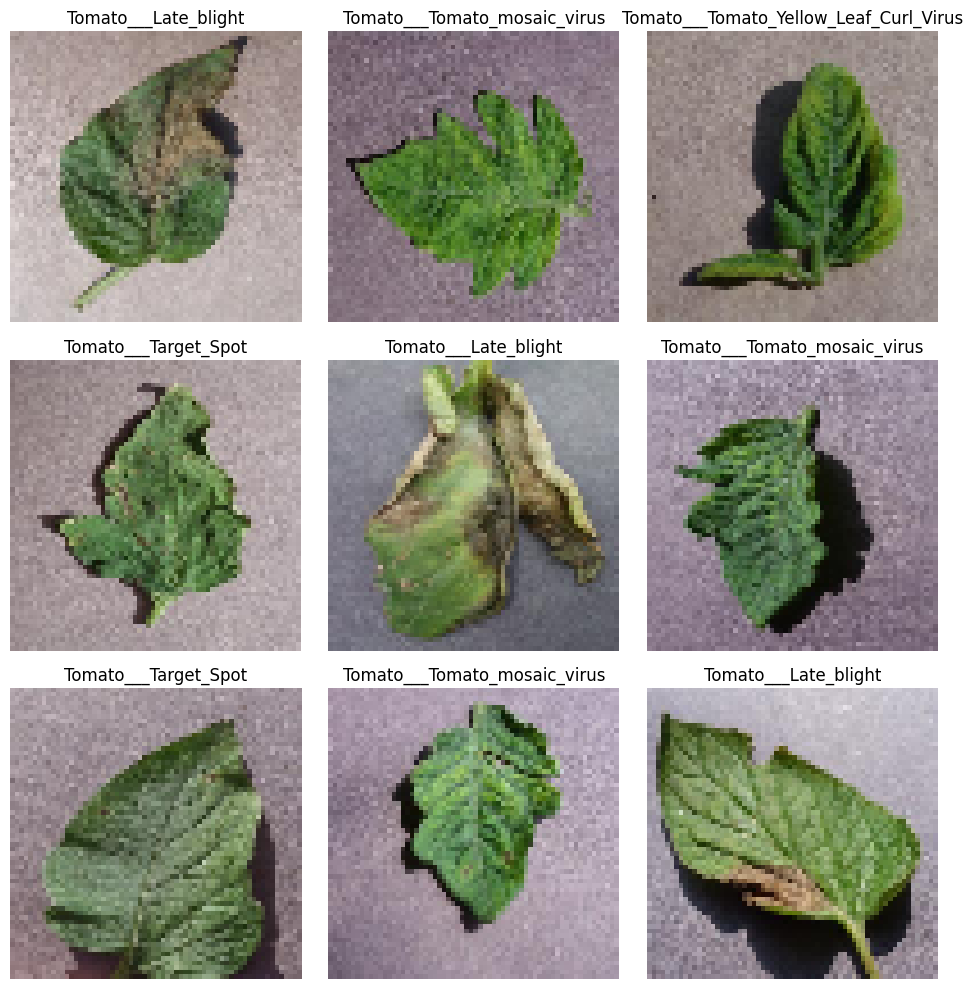

In [10]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis("off")
  plt.tight_layout()
plt.show()

In [11]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

hist_features = np.array([extract_color_histogram(img) for img in x])
x_features = np.array(hist_features)

In [12]:
x_features.shape

(9602, 512)

In [14]:
model=SVC(kernel='rbf',C=10,gamma="scale")

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Accuracy: 0.9786569495054659
F1 Score: 0.9785252582726816


Text(95.5815972222222, 0.5, 'True')

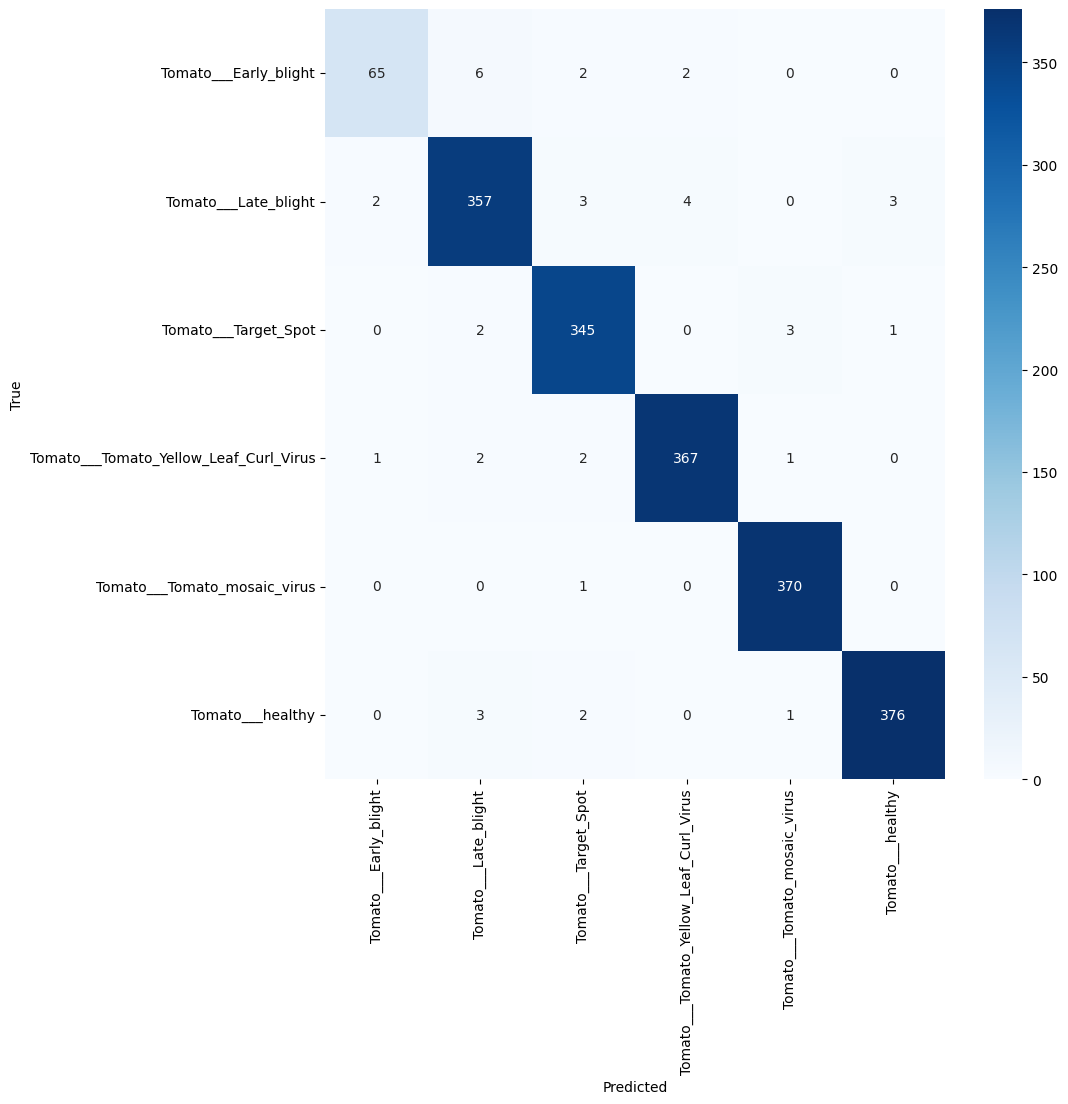

In [16]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

f1 = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")

In [17]:
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))


Classification Report:
                                        precision    recall  f1-score   support

                 Tomato___Early_blight       0.96      0.87      0.91        75
                  Tomato___Late_blight       0.96      0.97      0.97       369
                  Tomato___Target_Spot       0.97      0.98      0.98       351
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.98      0.98       373
          Tomato___Tomato_mosaic_virus       0.99      1.00      0.99       371
                      Tomato___healthy       0.99      0.98      0.99       382

                              accuracy                           0.98      1921
                             macro avg       0.98      0.96      0.97      1921
                          weighted avg       0.98      0.98      0.98      1921

